<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Comparison_with_Logistic_Regression_in_Business_Analytics_Predicting_Customer_Churn_with_Heart_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.92      0.85      0.88        13

    accuracy                           0.96        80
   macro avg       0.94      0.92      0.93        80
weighted avg       0.96      0.96      0.96        80

Logistic Regression Accuracy: 0.96
Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.92      0.85      0.88        13

    accuracy                           0.96        80
   macro avg       0.94      0.92      0.93        80
weighted avg       0.96      0.96      0.96        80

Linear SVM Accuracy: 0.96
RBF Kernel SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.92      0.85      0.88        13

    ac

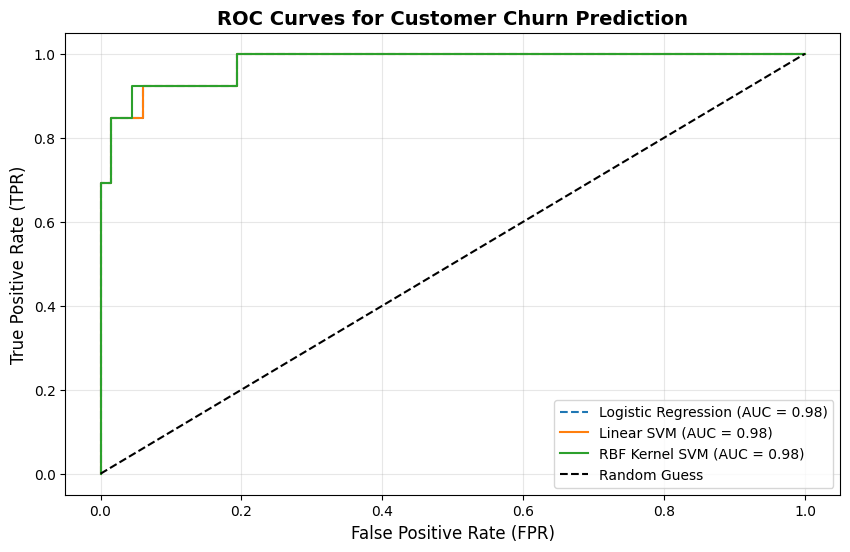

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Simulate a dataset
# I created this synthetic dataset to mimic a real-world scenario of predicting customer churn based on behavioral data.
# Feature 1 and Feature 2 are designed as proxies for customer behavior, with churn generated from a noisy threshold on their combined values.
n_samples = 400
np.random.seed(42)
feature_1 = np.random.uniform(0, 10, n_samples)
feature_2 = np.random.uniform(0, 10, n_samples)
churn = (feature_1 + feature_2 + np.random.normal(0, 2, n_samples) > 15).astype(int)

# Combine features into a DataFrame
# I used a DataFrame to keep the data organized and facilitate further analysis and visualization.
data = pd.DataFrame({"Feature 1": feature_1, "Feature 2": feature_2, "Churn": churn})

# Step 2: Preprocessing
# I split the dataset into training and testing sets to evaluate the models' generalization capabilities.
X = data.drop(columns=["Churn"])
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
# To ensure that features are comparable, I standardized them. This is particularly important for models like SVMs and Logistic Regression, which are sensitive to scale.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train and evaluate Logistic Regression
# Logistic Regression serves as a baseline model due to its simplicity and interpretability.
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predictions and evaluation
# I evaluated Logistic Regression using accuracy and a classification report to understand its strengths and weaknesses.
y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

# Step 4: Train and evaluate SVM with linear kernel
# I chose a linear kernel for the first SVM model to compare its decision boundary with Logistic Regression.
svc_linear = SVC(kernel="linear", C=1, probability=True)
svc_linear.fit(X_train_scaled, y_train)

# Predictions and evaluation for Linear SVM
# The performance of the linear SVM was assessed using the same metrics for consistency in comparisons.
y_pred_svm_linear = svc_linear.predict(X_test_scaled)
y_pred_proba_svm_linear = svc_linear.predict_proba(X_test_scaled)[:, 1]
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
print("Linear SVM Classification Report:")
print(classification_report(y_test, y_pred_svm_linear))
print(f"Linear SVM Accuracy: {accuracy_svm_linear:.2f}")

# Step 5: Train and evaluate SVM with RBF kernel
# To explore non-linear patterns in the data, I used an SVM with an RBF kernel, adjusting gamma for boundary flexibility.
svc_rbf = SVC(kernel="rbf", C=1, gamma=0.1, probability=True)
svc_rbf.fit(X_train_scaled, y_train)

# Predictions and evaluation for RBF SVM
# The RBF kernel's ability to model non-linear relationships was evaluated using similar metrics.
y_pred_svm_rbf = svc_rbf.predict(X_test_scaled)
y_pred_proba_svm_rbf = svc_rbf.predict_proba(X_test_scaled)[:, 1]
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
print("RBF Kernel SVM Classification Report:")
print(classification_report(y_test, y_pred_svm_rbf))
print(f"RBF Kernel SVM Accuracy: {accuracy_svm_rbf:.2f}")

# Step 6: Visualize ROC curves
# I created ROC curves to visualize the models' trade-offs between true positive and false positive rates.
def plot_roc_curves():
    plt.figure(figsize=(10, 6))

    # Logistic Regression ROC
    # Visualizing the ROC curve for Logistic Regression highlighted its balance between sensitivity and specificity.
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})", linestyle="--")

    # Linear SVM ROC
    # The linear SVM's ROC curve helped me compare its predictive power with Logistic Regression.
    fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test, y_pred_proba_svm_linear)
    roc_auc_svm_linear = auc(fpr_svm_linear, tpr_svm_linear)
    plt.plot(fpr_svm_linear, tpr_svm_linear, label=f"Linear SVM (AUC = {roc_auc_svm_linear:.2f})")

    # RBF Kernel SVM ROC
    # The ROC curve for the RBF kernel SVM demonstrated its effectiveness in capturing complex patterns in the data.
    fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test, y_pred_proba_svm_rbf)
    roc_auc_svm_rbf = auc(fpr_svm_rbf, tpr_svm_rbf)
    plt.plot(fpr_svm_rbf, tpr_svm_rbf, label=f"RBF Kernel SVM (AUC = {roc_auc_svm_rbf:.2f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.title("ROC Curves for Customer Churn Prediction", fontsize=14, fontweight="bold")
    plt.xlabel("False Positive Rate (FPR)", fontsize=12)
    plt.ylabel("True Positive Rate (TPR)", fontsize=12)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

plot_roc_curves()
